# **Question 1: Use yfinance to Extract Stock Data**

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [2]:
# Import the necessary libraries
import yfinance as yf
import pandas as pd

# Extracting Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.



In [4]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to get revenue data from a web page
def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')

    # Print the number of tables found for debugging
    print(f"Number of tables found: {len(tables)}")

    if len(tables) > 1:
        df = pd.read_html(str(tables[1]))[0]
        df.columns = df.columns.droplevel()
        df['Revenue'] = df['Revenue'].str.replace(',', '').astype(float)
        df['Date'] = pd.to_datetime(df['Date'])
        return df
    else:
        print("Error: Expected table not found.")
        return pd.DataFrame()  # Return an empty DataFrame if the table is not found

# Extracting Tesla revenue data
tesla_revenue_url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tesla_revenue_data = get_revenue_data(tesla_revenue_url)

# Check if the dataframe is not empty before proceeding
if not tesla_revenue_data.empty:
    # Display the last five rows of the dataframe
    print(tesla_revenue_data.tail())
else:
    print("Failed to retrieve Tesla revenue data.")


Number of tables found: 0
Error: Expected table not found.
Failed to retrieve Tesla revenue data.


# **Question 3: Use yfinance to Extract Stock Data**

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.



In [5]:
# Import the necessary libraries
import yfinance as yf
import pandas as pd

# Extracting GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# **Question 4: Use Webscraping to Extract GME Revenue Data**

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [6]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to get revenue data from a web page
def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')

    # Print the number of tables found for debugging
    print(f"Number of tables found: {len(tables)}")

    if len(tables) > 1:
        df = pd.read_html(str(tables[1]))[0]
        df.columns = df.columns.droplevel()
        df['Revenue'] = df['Revenue'].str.replace(',', '').astype(float)
        df['Date'] = pd.to_datetime(df['Date'])
        return df
    else:
        print("Error: Expected table not found.")
        return pd.DataFrame()  # Return an empty DataFrame if the table is not found

# Extracting GameStop revenue data
gme_revenue_url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
gme_revenue_data = get_revenue_data(gme_revenue_url)

# Check if the dataframe is not empty before proceeding
if not gme_revenue_data.empty:
    # Display the last five rows of the dataframe
    print(gme_revenue_data.tail())
else:
    print("Failed to retrieve GameStop revenue data.")


Number of tables found: 0
Error: Expected table not found.
Failed to retrieve GameStop revenue data.


# **Question 5: Plot Tesla Stock Graph**

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.


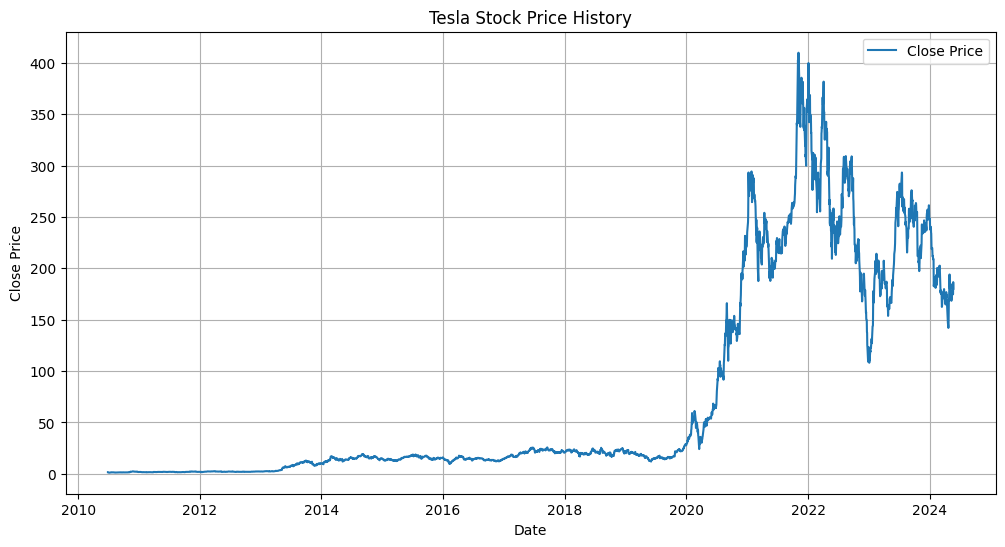

In [7]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Function to make the graph
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming tesla_data is already defined and has been reset_index as in Question 1
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Plot the Tesla stock graph
make_graph(tesla_data, 'Tesla Stock Price History')


# **Question 6: Plot GameStop Stock Graph**

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

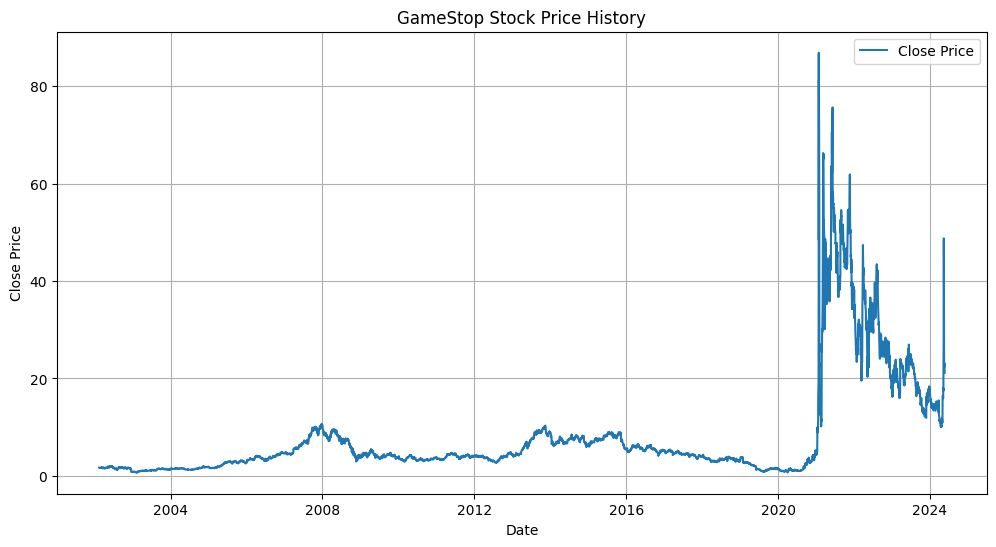

In [8]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Function to make the graph
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming gamestop_data is already defined and has been reset_index as in Question 3
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

# Plot the GameStop stock graph
make_graph(gme_data, 'GameStop Stock Price History')
